In [1]:
import pandas as pd
import numpy as np

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud

In [3]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력 default:20
pd.set_option('display.max_rows', 10) #None으로 설정하면 모든 행 출력 default: 50

# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) #None으로 설정하면 모든 내용을 출력 default:60

In [4]:
# 정규화
import re

In [5]:
# 날짜는 파이썬 표준 라이브러리 datetime 사용
import datetime
# 오늘 날짜 가져오기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2025-01-08 09:25:41.776463


'2025-01-08'

In [6]:
df = pd.read_csv(f'news_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시
0,매일경제,"더존비즈온, 춘천 ‘개인정보 안심구역’ 본격 운영","\n 민간 최초 운영기관 지정의료데이터 활용 등 지원 사진 확대 더존비즈온 강촌캠퍼스. [더존비즈온] 더존비즈온은 강원 춘천 강촌캠퍼스 내 첨단의료 분야 특화 개인정보 안심구역을 본격적으로 운영한다고 8일 밝혔다.앞서 더존비즈온은 지난해 민간 기업 최초로 개인정보 안심구역 운영기관으로 선정됐다.개인정보 안심구역은 가명정보를 안전하게 처리하고 활용할 수 있는 보안 공간이다. 데이터 품질 훼손을 최소화하고 안전하게 처리할 수 있도록 지원한다.특히 의료 데이터는 개인정보 보호 측면에서 매우 민감한 데이터로 분류되기 때문에 안전한 환경이 필수적이다. 개인정보 안심구역은 기업과 연구기관이 이러한 데이터를 보다 안전하게 활용할 수 있는 환경을 제공한다.더존비즈온은 안심구역 운영을 통해 의료 데이터를 활용한 인공지능(AI) 모델 개발을 적극 지원할 계획이다. AI와 빅데이터 기술을 접목한 의료 및 바이오산업의 혁신이 기대된다.춘천 광판리에 조성될 기업혁신파크와의 연계성도 강화할 계획이다. 춘천 기업혁신파크는 더존비즈온이 앵커기업으로 참여하는 사업이다. ICT, 바이오, AI 등 첨단 지식산업을 위한 생태계 조성을 목표로 한다.더존비즈온 송호철 플랫폼사업부문 대표는 “이번 개인정보 안심구역 운영이 데이터 보호와 활용 간의 균형을 실현하는 데 있어 중요한 전환점이 될 것”이라며 “정밀의료와 바이오산업의 발전뿐 아니라 중소기업 데이터 플랫폼 구축 등 다양한 분야에서 데이터 활용 생태계를 활성화하기 위해 지속적으로 노력할 것”이라고 말했다.\n",2025-01-08 09:19:48


In [7]:
df.shape

(100, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언론사     100 non-null    object
 1   제목      100 non-null    object
 2   내용      100 non-null    object
 3   작성일시    100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [9]:
df.describe()

,언론사,제목,내용,작성일시
count,100,100,100,100
unique,2,100,100,89
top,매일경제,"더존비즈온, 춘천 ‘개인정보 안심구역’ 본격 운영","\n 민간 최초 운영기관 지정의료데이터 활용 등 지원 사진 확대 더존비즈온 강촌캠퍼스. [더존비즈온] 더존비즈온은 강원 춘천 강촌캠퍼스 내 첨단의료 분야 특화 개인정보 안심구역을 본격적으로 운영한다고 8일 밝혔다.앞서 더존비즈온은 지난해 민간 기업 최초로 개인정보 안심구역 운영기관으로 선정됐다.개인정보 안심구역은 가명정보를 안전하게 처리하고 활용할 수 있는 보안 공간이다. 데이터 품질 훼손을 최소화하고 안전하게 처리할 수 있도록 지원한다.특히 의료 데이터는 개인정보 보호 측면에서 매우 민감한 데이터로 분류되기 때문에 안전한 환경이 필수적이다. 개인정보 안심구역은 기업과 연구기관이 이러한 데이터를 보다 안전하게 활용할 수 있는 환경을 제공한다.더존비즈온은 안심구역 운영을 통해 의료 데이터를 활용한 인공지능(AI) 모델 개발을 적극 지원할 계획이다. AI와 빅데이터 기술을 접목한 의료 및 바이오산업의 혁신이 기대된다.춘천 광판리에 조성될 기업혁신파크와의 연계성도 강화할 계획이다. 춘천 기업혁신파크는 더존비즈온이 앵커기업으로 참여하는 사업이다. ICT, 바이오, AI 등 첨단 지식산업을 위한 생태계 조성을 목표로 한다.더존비즈온 송호철 플랫폼사업부문 대표는 “이번 개인정보 안심구역 운영이 데이터 보호와 활용 간의 균형을 실현하는 데 있어 중요한 전환점이 될 것”이라며 “정밀의료와 바이오산업의 발전뿐 아니라 중소기업 데이터 플랫폼 구축 등 다양한 분야에서 데이터 활용 생태계를 활성화하기 위해 지속적으로 노력할 것”이라고 말했다.\n",2025.01.07 16:15
freq,50,1,1,3


In [10]:
# 중복된 행이 있는지 확인
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [11]:
df.duplicated().sum()

0

In [12]:
df['작성일시'].value_counts().sort_values(ascending=False).head().index

Index(['2025.01.07 16:15', '2025.01.07 17:52', '2025-01-07 17:37:49',
       '2025-01-07 17:52:56', '2025-01-07 17:55:40'],
      dtype='object', name='작성일시')

In [13]:
df[df.duplicated(subset='작성일시')].sort_values(by='작성일시')

,언론사,제목,내용,작성일시
19,매일경제,[MK 시그널] 조선업 호황에 엔진 호조 HD현대마린 주가 날았다,"\n◆ MK 시그널 ◆\n선박 엔진 전문업체 HD현대마린엔진이 연일 수주 기록을 경신하고 있다. 특히 지난해 7월 HD현대그룹에 인수된 이후 4개월 동안 작년 전체 수주액의 60%가 넘는 수주를 달성했다. 조선업의 장기 불황이 걷히면서 엔진업계 업황도 살아나는 것이다.\n국내·미국 주식 투자 서비스 MK시그널은 HD현대마린엔진과 관련해 23%의 수익률을 달성하며 차익 실현에 성공했다.\nMK시그널은 인공지능(AI)이 국내·미국 주식 8000여 개 종목에 대한 투자 정보와 매매 신호를 국내 최초로 하나의 애플리케이션(앱)에서 제공하는 매일경제 증권 정보 서비스다.\nHD현대마린엔진은 계속된 신규 수주 실적 기대감에 주가 상승 모멘텀이 만들어졌다. HD현대마린엔진은 지난해 4319억원 규모의 신규 수주를 받았는데, 이 중 2738억원(63.4%)을 인수된 이후 4개월간 거뒀다. 회사는 2021년 80억원의 영업손실을 기록했지만, 지난해 3분기에는 누적 241억원의 흑자를 냈다.\n최근 글로벌 선박 엔진 시장 성장과 친환경 선박으로의 전환이 업계 화두로 떠오르면서 이중연료(DF) 엔진 개발과 수주가 크게 증가할 것으로 전망된다.\nMK시그널에 따르면 지난달 31일~이달 6일 주간 단위로 AI가 매매한 종목 가운데 수익률 상위를 집계한 결과 국내 주식은 HD현대마린엔진(23%), 이오테크닉스(22.9%), 레인보우로보틱스(22.4%), SK스퀘어(22.4%), 에이직랜드(20.2%) 순으로 높았다. 미국 주식은 컴포시큐어(CMPO·129.1%), BTCS(BTCS·101.6%), 유나이티드테라퓨틱스(UTHR·55.4%) 순이었다.\n\n",2025-01-07 17:37:49
14,매일경제,"""트럼프가 끝낸다"" 한마디에… 전쟁 재건주 강세","\n\n\n'조립주택' 범양건영 21% 껑충동신건설·삼부토건 동반상승\n\n\n볼로디미르 젤렌스키 우크라이나 대통령이 도널드 트럼프 미국 대통령 당선인의 러시아·우크라이나 간 전쟁 종전 의지를 믿는다고 말하면서 우크라이나 재건과 건설 관련 종목 주가가 상승하며 주목받았다.\n7일 한국거래소에 따르면 범양건영은 관련 종목 중 가장 높은 상승률을 보이며 전 거래일 대비 21.46% 상승한 3085원에 거래를 마쳤다.\n모듈러(조립식) 주택 제조를 주력 사업으로 운영하는 범양건영은 이리나 베레슈크 우크라이나 부총리가 2022년 ""모듈러 주택 기술을 보유한 한국이 도움을 줬으면 한다""고 말한 이후 대표적인 우크라이나 재건 테마주로 꼽혀 왔다.\n범양건영을 선두로 중소형 건설 종목도 이날 강세를 보였다. 동신건설은 전 거래일 대비 6.68% 상승한 5만4300원에, 삼부토건은 6.34% 오른 990원에 장을 마감했다. 금호건설의 우선주인 금호건설우도 이날 5.94% 오른 1만3550원에 거래를 마쳤다.\n러시아·우크라이나 전쟁 종식 이후 농업 재건 사업의 수혜를 입을 것으로 예상되는 대동기어도 이날 전 거래일 대비 6.56% 오른 1만5930원에 거래를 마무리했다.\n이날 우크라이나 재건과 건설 관련주가 일제히 크게 오른 것은 트럼프 당선인의 취임을 앞두고 젤렌스키 대통령이 종전에 힘을 실어주는 발언을 꺼냈기 때문으로 분석된다.\nAFP통신 등에 따르면 지난 5일(현지시간) 젤렌스키 대통령은 미국 팟캐스터인 렉스 프리드먼과의 인터뷰에서 ""그(트럼프 당선인)는 블라디미르 푸틴 러시아 대통령에게 압박을 가할 만큼 충분한 힘을 갖고 있다""고 강조했다.\n[정상봉 기자]\n\n",2025-01-07 17:52:56
11,매일경제,"H&Q코리아, 티앤에프글로벌 대규모 투자",\n\n\n미래車 핵심부품 HUD 제조사\n\n\n국내 주요 사모펀드(PEF)인 H&Q코리아가 오는 2월까지 국내 자동차 부품사 티앤에프글로벌에 대규모 자금을 투자한다.\n7일 투자은행(IB) 업계에 따르면 H&Q코리아는 1000억원대 자금을 들여 티앤에프글로벌에 대규모 투자를 단행한다.\n티앤에프글로벌은 PEF 팍스톤매니지먼트가 만든 티앤에프글로벌홀딩스가 지분 100%를 가지고 있었다. 팍스톤매니지먼트는 2022년 티앤에프글로벌에 약 700억원을 투자한 바 있다.\n2009년 설립된 티앤에프글로벌은 차량에 장착되는 헤드업디스플레이(HUD)를 생산하는 업체다.\n티앤에프글로벌의 주력 상품인 HUD는 차량 주행에 필요한 정보를 운전석 바로 앞 유리창 부분에 그래픽 이미지로 투영해 운전자가 운전하는 동안 전방의 시선을 유지하면서 읽을 수 있게 해주는 디스플레이 장치다. 최근 전기차 도입 등으로 차량에 장착되는 전장부품이 크게 늘어나면서 HUD는 핵심 부품으로 여겨지고 있다. 자율주행차 등이 도입되면 HUD 수요는 더욱 확대될 전망이다.\n티앤에프글로벌 실적은 최근 몇 년 새 증가하고 있다. 연결재무제표 기준 티앤에프글로벌 매출은 2018년 382억원에서 2023년 842억원으로 증가했다. 같은 기간 영업이익은 15억원에서 102억원으로 늘어났다.\n이번 딜을 통해 H&Q코리아는 2020년 10월 조성했던 4호 블라인드 펀드(5000억원)의 소진을 마칠 전망이다.\n[나현준 기자]\n\n,2025-01-07 17:55:40
80,한국경제,대세로 떠오른 'AI 소프트웨어' 투자하려면,"\n 반도체가 주축이던 인공지능(AI) 섹터 투자 ‘대세’가 소프트웨어 분야로 확산하고 있다. 지난 몇년간은 하드웨어와 반도체 업종이 생성형 AI 시대 기대감에 주목받았지만, 작년 하반기 주가 성과를 보면 소프트웨어 업종이 반도체를 크게 앞서는 모습이다.‘스마트 머니’ 이동의 중심에는 AI 추론 기술에 대한 성장 기대가 있다. 기존 AI 서비스의 역할은 기계학습(머신러닝) 모델 기반 챗봇에 그쳤다. 반면 앞으로 AI 서비스는 사람의 개입이 없이도 특정 작업을 수행할 수 있는 자율지능형 AI 에이전트, AI 영상, 자율주행 등의 영역으로 확장될 것이다. 이 과정에서 AI의 역할이 ‘학습’에서 ‘추론’으로 넘어가게 된다.이 시기 주가 측면에서 중요한 것은 기업이 AI 소프트웨어를 기반으로 수익화를 이룰 수 있는지다. 기존 AI 서비스는 커머셜 분야로 빠르게 확산했다. 앞으로는 국방 부문과 정부 기관 서비스에 적용돼 클라우드 인프라의 성장을 이끌 것이다.이 과정에서 투자자는 AI 소프트웨어 시장 성장의 수혜를 받는 개별주 중심으로 접근할 수 있겠으나 상장지수펀드(ETF) 역시 대안으로 꼽힌다. 산업 전체의 성장 모멘텀을 누릴 수 있기도 하고, 높아진 개별주 변동성을 일부 상쇄할 수 있어서다. 일부 개별주는 이미 높은 주가 밸류에이션이 부담되는 상황이다.대안은 여러 개다. AI의 큰 손인 빅테크 업종 중심 투자를 이어가거나, 소프트웨어 업종으로 시야를 좁힐 수도 있다. 혹은 AI, 사이버보안 등 특정 테마 콘셉트의 ETF로도 투자할 수 있다.이 중 대표 업종 ETF인 ‘아이셰어즈 익스팬디드 테크-소프트웨어 섹터’(IGV) ETF는 가장 일반적인 대안이다. IGV는 미국에 상장된 소프트웨어, 미디어, 테크 서비스 관련 기업에 투자한다. 펀드 자산 규모는 100억달러이며 운용 보수는 0.41%다.\n\n\n\n\n\n 상위 투자 종목은 마이크로소프트, 오라클, 세일즈포스, 서비스나우, 어도비, 인튜이트, 팰런티어테크놀로지스, 팰로앨토네트웍스 등이며 약 130개를 편입하고 있다. 클라우드의 대표 기업을 비롯해 기업간거래(B2B) 정보기술(IT) 서비스 기업, 최근 모멘텀이 지속되는 팰런티어 등의 소프트웨어 기업을 한데 모아 AI 소프트웨어에 바스켓(묶음)으로 투자하고 싶은 투자자에게 적절한 대안이 될 것이다.임은혜 삼성증권 수석연구위원\n",2025.01.07 16:15
81,한국경제,반도체 공정 혁신하는 TSMC와 대만 업체들,"\n 반도체 공정에서 무어의 법칙으로 통하는 트랜지스터의 미세화는 어려워졌다. 지난 수십 년간은 작은 트랜지스터를 만든 뒤 같은 웨이퍼에 더 많은 트랜지스터를 배치해 원가를 낮추고, 트랜지스터의 퍼포먼스를 높이는 방식으로 발전했다. 이제는 더 작게 제작하려면 돈이 너무 많이 든다.요즘 대세가 된 것은 적당히 작은 공정을 선택하되 칩 

In [14]:
df.duplicated().describe()

count       100
unique        1
top       False
freq        100
dtype: object

In [15]:
df['언론사'].value_counts()

언론사
매일경제    50
한국경제    50
Name: count, dtype: int64

#### 텍스트 길이 분석

In [16]:
# 제목,내용 길이
df['제목_길이'] = df['제목'].str.len()
df['내용_길이'] = df['내용'].str.len()

In [17]:
# 제목,내용 토큰 갯수
# split() : 공백을 구분자로 list로 반환해주기때문에 str 두번써야됨
df['제목_토큰_갯수'] = df['제목'].str.split().str.len()
df['내용_토큰_갯수'] = df['내용'].str.split().str.len()

In [18]:
df[['제목_길이','제목_토큰_갯수','내용_길이','내용_토큰_갯수']].describe()

,제목_길이,제목_토큰_갯수,내용_길이,내용_토큰_갯수
count,100.000000,100.000000,100.000000,100.000000
mean,33.270000,6.910000,1236.020000,248.960000
std,8.773071,2.035518,704.899806,150.921876
min,16.000000,4.000000,48.000000,4.000000
25%,27.000000,5.000000,806.750000,162.000000
50%,34.000000,7.000000,1074.500000,212.500000
75%,39.000000,8.000000,1560.750000,317.750000
max,72.000000,16.000000,4625.000000,1021.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   언론사       100 non-null    object
 1   제목        100 non-null    object
 2   내용        100 non-null    object
 3   작성일시      100 non-null    object
 4   제목_길이     100 non-null    int64 
 5   내용_길이     100 non-null    int64 
 6   제목_토큰_갯수  100 non-null    int64 
 7   내용_토큰_갯수  100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


array([[<Axes: title={'center': '제목_길이'}>,
        <Axes: title={'center': '내용_길이'}>],
       [<Axes: title={'center': '제목_토큰_갯수'}>,
        <Axes: title={'center': '내용_토큰_갯수'}>]], dtype=object)

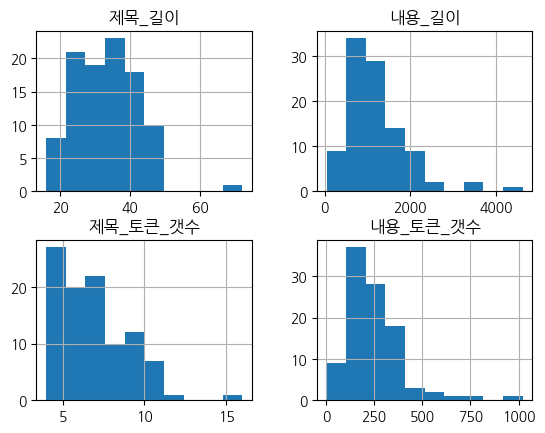

In [20]:
df.hist(bins=10)

In [21]:
df[df['제목_길이'] == df['제목_길이'].max()]

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_갯수,내용_토큰_갯수
39,매일경제,"[MK시그널] 필옵틱스, AI 반도체 강세로 유리기판 관련주 강세에 주가 상승세... MK시그널 추천 후 상승률 23.36% 기록","\n 사진 확대 1월 7일 필옵틱스(161580)가 강세다. 전일 필옵틱스 주가는 종가 기준 1.96% 상승한 20,850원에 마감했다. 현재는 23,750원으로 (9시 14분 기준) 전일 종가 대비 13.91% 상승한 상태를 보이고 있다.MK시그널은 필옵틱스를 AI 5호를 통해 25년 1월 3일 매수 추천했으며, 1월 7일 목표가 도달에 따른 매도 전략에 따라 21.60%의 평가손익 수익률을 기록하고 있다.(MK시그널의 투자전략에 따른 수익 성과는 투자자별로 상이할 수 있습니다.)인공지능이 선정한 포트폴리오 AI 5호는 성장성과 모멘텀을 겸비한 저평가된 중소형주로 포트폴리오 구성이 되어 있으며, 중소형주 대상 스윙 투자 전략 시그널을 제공하고 있다. 포트폴리오 편입 후 최대 보유 기간은 20일, 목표가 20%, 손절가 10% 원칙으로 편출 전략을 가져가고 있다.필옵틱스(161580)는 AI 반도체 강세 속 유리기판 관련주들 강세에 주가가 상승하는 것으로 보인다. 필옵틱스는 대표적인 유리기판 관련주로, 유리기판은 26년 상용화 전망에 따라 기존 소재보다 소비 전력을 30% 줄일 수 있어 꿈의 기판이라고 불리고 있다.MK시그널 현재 ‘첫 달 무료 이벤트’ 진행중!국내 주식과 더불어 미국 주식까지 한 번에! 빅데이터 알고리즘 AI의 추천 종목 매매 신호 받아보세요!인공지능(AI) 기반 매매신호 제공 앱 MK시그널이 뜨거운 성원에 힘입어, 6월 30일까지 고객 감사 할인 이벤트를 진행합니다! 회원가입 시 첫 달 무료 혜택과 함께 평생 최대 50% 할인을 제공합니다. 구글 플레이스토어와 애플 앱스토어에서 앱을 다운로드하고 회원가입 한 모든 회원이 참여할 수 있습니다. 이번 기회를 놓치지 말고 MK시그널과 함께 스마트하고 성공적인 투자를 시작하세요!▶MK시그널 한 달 무료체험하기 (클릭)◀▶MK시그널 iOS 버전 바로 다운받기 (클릭)◀▶MK시그널 안드로이드 버전 다운받기 (클릭)◀HOT 종목 : 케이엔알시스템 한화오션 일승 레인보우로보틱스 HB테크놀러지 한국첨단소재 나노엔텍\n",2025-01-07 11:11:55,72,1013,16,219


In [22]:
df[df['제목_길이'] == df['제목_길이'].max()]['제목'].values

array(['[MK시그널] 필옵틱스, AI 반도체 강세로 유리기판 관련주 강세에 주가 상승세... MK시그널 추천 후 상승률 23.36% 기록'],
      dtype=object)

#### 워드클라우드 시각화

- https://github.com/amueller/word_cloud

In [23]:
# 제목을 하나의 문자열로 만들기 (제목과 제목사이에 공백을 하나 줌)
news_title = ' '.join(df['제목'])

# 문자열도 인덱싱/슬라이싱이 가능
news_title[:100]

'더존비즈온, 춘천 ‘개인정보 안심구역’ 본격 운영 [속보] 삼성전자 4분기 영업익 6.5조원…시장전망 밑돌아 “LG생활건강, 4Q 영업익 시장 전망치 밑돌 전망”…목표가↓ “잡음 '

In [24]:
WordCloud?

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

In [25]:
def display_word_cloud(str, max_words=30, width=1200,height=600) : 

    # r스트링 쓰는이유 : \ 를 특별한 의미로 해석하지말고 평범한 하나의 문자로 해석하게 하기위함
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','상승','하락','상장','투자','서학','동학','기업','시장'
                 '시총','목표가','올해','내년','국내','해외','외국인','소식에','기대감','증시','한국']
    word_cloud = WordCloud(font_path = font_path,
              width=width,
              height=height,
              stopwords=stopwords,
              background_color='white',
              min_word_length = 2,
              max_words = max_words,
              random_state=2024).generate(str)
    plt.imshow(word_cloud)
    plt.show()
    return word_cloud

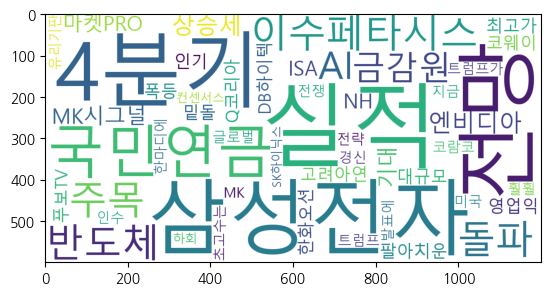

In [26]:
display_word_cloud(news_title,50)

In [27]:
# tmp_str = ''.join(df[df['제목'].str.contains('제주항공')]['내용'])
# tmp_word_cloud = display_word_cloud(tmp_str,50)

In [28]:
tmp_str = ''.join(df[df['제목'].str.contains('이마트')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,100)

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
tmp_word_cloud.words_

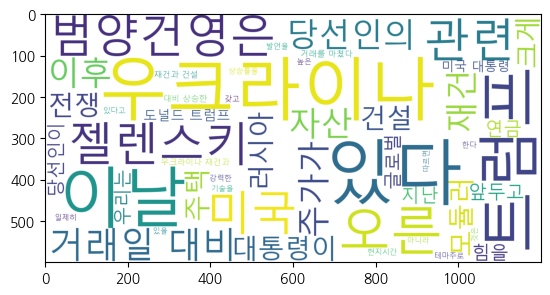

In [29]:
tmp_str = ''.join(df[df['제목'].str.contains('트럼프')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

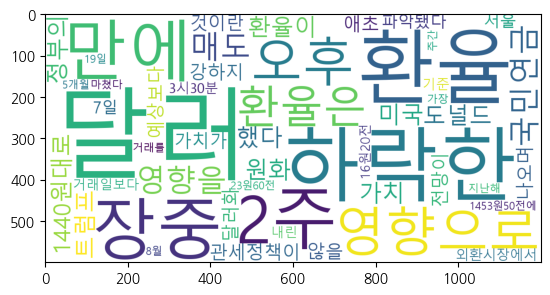

In [30]:
tmp_str = ''.join(df[df['제목'].str.contains('환율')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

In [31]:
tmp_word_cloud.words_

{'달러': 1.0,
 '하락한': 0.6,
 '환율': 0.6,
 '2주': 0.4,
 '만에': 0.4,
 '장중': 0.4,
 '영향으로': 0.4,
 '오후': 0.4,
 '환율은': 0.4,
 '영향을': 0.4,
 '국민연금': 0.4,
 '매도': 0.4,
 '환율이': 0.2,
 '1440원대로': 0.2,
 '원화': 0.2,
 '가치': 0.2,
 '했다': 0.2,
 '미국': 0.2,
 '도널드': 0.2,
 '트럼프': 0.2,
 '정부의': 0.2,
 '관세정책이': 0.2,
 '애초': 0.2,
 '예상보다': 0.2,
 '강하지': 0.2,
 '않을': 0.2,
 '것이란': 0.2,
 '전망이': 0.2,
 '나오며': 0.2,
 '달러화': 0.2,
 '가치가': 0.2,
 '파악됐다': 0.2,
 '7일': 0.2,
 '서울': 0.2,
 '외환시장에서': 0.2,
 '3시30분': 0.2,
 '기준': 0.2,
 '거래일보다': 0.2,
 '16원20전': 0.2,
 '내린': 0.2,
 '1453원50전에': 0.2,
 '주간': 0.2,
 '거래를': 0.2,
 '마쳤다': 0.2,
 '지난해': 0.2,
 '8월': 0.2,
 '19일': 0.2,
 '23원60전': 0.2,
 '5개월': 0.2,
 '가장': 0.2}

#### 형태소 분석기로 특정품사만 추출하기

In [32]:
# !pip install pecab

In [33]:
from pecab import PeCab
pecab = PeCab()

In [34]:
dir(pecab)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_tokenize',
 'morphs',
 'nouns',
 'pos',
 'postprocessor',
 'tokenizer']

In [35]:
text = '아버지가 방에 들어가신다 주말 여행 영남권'

In [36]:
print(pecab.morphs(text))
print(pecab.nouns(text))
print(pecab.pos(text))
# print(pecab.postprocessor(text))

['아버지', '가', '방', '에', '들어가', '신다', '주말', '여행', '영남', '권']
['아버지', '방', '주말', '여행', '영남']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EC'), ('주말', 'NNG'), ('여행', 'NNG'), ('영남', 'NNP'), ('권', 'XSN')]


In [37]:
# 처리시간이 걸리는 작업의 프로세스 진행률을 보여줌

from tqdm import tqdm
tqdm.pandas()

In [38]:
df['제목_명사'] = df['제목'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

100%|██████████| 100/100 [00:02<00:00, 47.79it/s]


In [39]:
# pecab은 데이터가 많을경우는 속도가 너무 느림
# df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

### JDK 설치

1) 최신버전의 JAVA(JDK)를 설치
2) JAVA_HOME 환경변수를 추가
3) path 환경변수에 %JAVA_HOME%\bin; 추가

#### konlpy 설치
- pip install --upgrade pip
- pip install JPype1    (Java와 Python을 연결해주는 역할)
- pip install konlpy --upgrade
- https://konlpy.org/ko/latest/install


In [40]:
from konlpy.tag import Okt

In [41]:
okt = Okt()

In [42]:
dir(okt)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'jki',
 'morphs',
 'normalize',
 'nouns',
 'phrases',
 'pos',
 'tagset']

In [43]:
txt = '아버지 방에 들어가신다'
okt.morphs(txt)

['아버지', '방', '에', '들어가신다']

In [44]:
okt.pos(txt)

[('아버지', 'Noun'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [45]:
okt.nouns(txt)

['아버지', '방']

In [46]:
df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(okt.nouns(x)))

100%|██████████| 100/100 [00:10<00:00,  9.97it/s]


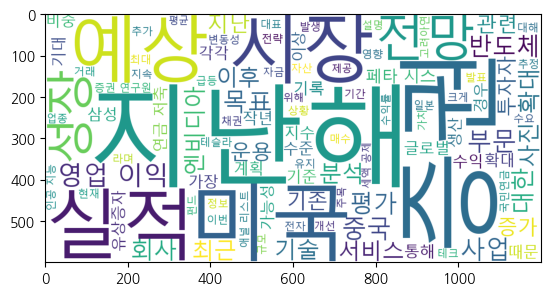

In [47]:
str = ''.join(df['내용_명사'])

dwc = display_word_cloud(str,100)

In [48]:
tmp = df.loc[df[df['내용_명사'].str.contains('테슬라')].index].head(1)['내용'].values[0]
type(tmp)

str

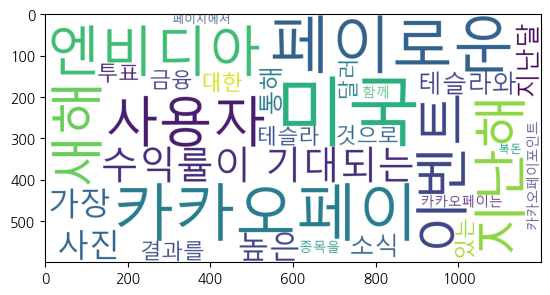

In [49]:
display_word_cloud(tmp,30)

In [50]:
len(okt.pos(tmp))

491

In [51]:
unique_words_dict = {}
for word, tag in okt.pos(tmp):
    if word not in unique_words_dict:
        unique_words_dict[word] = tag

# 딕셔너리의 길이 (고유한 단어 수)
len(unique_words_dict)

246

In [52]:
# 중복된 어휘 제거
unique_words = []
pos_list = []
for word, tag in okt.pos(tmp) :
    if word not in unique_words : 
        unique_words.append(word)
        pos_list.append(tag)

len(unique_words)
for item in zip(unique_words,pos_list) :
    print(item[0], item[1])


# for word, tag in pecab.pos(tmp) :
    # if word == '통해' :
    #     print(word, tag)
    


       Foreign
사진 Noun
확대 Noun
카카오 Noun
페이 Noun
, Punctuation
미 Adjective
증시 Noun
기 Modifier
대주 Noun
사용자 Noun
설문 Noun
공개 Noun
[ Punctuation
출처 Noun
= Punctuation
] Punctuation
올해 Noun
가장 Noun
높은 Adjective
수익률 Noun
이 Josa
기대 Noun
되는 Verb
미국 Noun
주식 Noun
으로 Josa
들 Suffix
은 Josa
테슬라 Noun
와 Josa
엔비디아 Noun
를 Josa
꼽았다 Noun
. Punctuation
두 Determiner
는 Josa
지난달 Noun
중순 Noun
‘ Foreign
로운 Josa
소식 Noun
’ Punctuation
을 Josa
통해 Noun
진행 Noun
된 Verb
설문조사 Noun
결과 Noun
7일 Number
했다 Verb
금융 Noun
· Punctuation
투자 Noun
부동산 Noun
등 Noun
생활 Noun
밀착 Noun
형 Suffix
콘텐츠 Noun
선보이는 Verb
서비스 Noun
다 Josa
총 Noun
6만 Number
7447 Number
명 Noun
참여 Noun
한 Josa
2025년 Number
종목 Noun
꼽는 Noun
이번 Noun
에서 Josa
( Punctuation
45% Number
) Foreign
28% Number
가 Verb
각각 Noun
1 Number
2 Number
위 Noun
기록 Noun
하며 Verb
빅테크 Noun
에 Josa
대한 Noun
꾸준히 Adjective
이어지고 Verb
있는 Adjective
것 Noun
드러났다 Verb
투표 Noun
후보 Noun
마이크로소프트 Noun
메타 Noun
페이스북 Noun
), Punctuation
아마존닷컴 Noun
알파벳 Noun
구글 Noun
애플 Noun
지난해 Noun
12월 Number
13일 Number
기준 Noun
나스닥 

In [53]:
df.columns

Index(['언론사', '제목', '내용', '작성일시', '제목_길이', '내용_길이', '제목_토큰_갯수', '내용_토큰_갯수',
       '제목_명사', '내용_명사'],
      dtype='object')

In [55]:
df.to_csv(f'news_preprocessed_{today}.csv',index=False, encoding='utf-8-sig')

In [ ]:
dwc.words_

In [ ]:
okt.tagset?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cvect = CountVectorizer()

In [ ]:
X = cvect.fit_transform(df['제목_명사'])

In [ ]:
tmp = pd.DataFrame(X.toarray(), columns=cvect.get_feature_names_out())

In [ ]:
tmp.sum().sort_values(ascending=False)